# Feature Exploration

In this notebook, [prevously prepared](./feature-extraction.ipynb) small datasets with different features will be explored for the accuracy.

In [1]:
import pickle
import numpy as np
import timeit
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Classifier

In [2]:
# SVM
# support vector regressor instance
svr = svm.SVC(kernel='rbf')
# parameters for gridsearch
parameters = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.01, 0.1, 1, 10, 'auto']}
# the classifier
clf = GridSearchCV(svr, parameters)

## Explore

In [3]:
# a helper function
def explore_datasets(dataset_types):
    for dataset_paths in dataset_types:
        for dataset_path in dataset_paths:
            with open(dataset_path, mode='rb') as f:
                dataset = pickle.load(f)
                # load features and labels
                X = dataset['features']
                y = dataset['labels']
                # shuffle and split dataset (for shuffle=False sklearn should be v0.19)
                X_train, X_test, y_train, y_test =\
                    train_test_split(X, y, test_size=0.33, shuffle=False)
                # normalize features
                X_scaler = StandardScaler().fit(X_train)
                scaled_X_train = X_scaler.transform(X_train)
                # Train the classifier
                start_time = timeit.default_timer()
                print(
                    'fit rbf kernel for dataset: '
                    + dataset_path.split('/')[-2]
                    + '/'
                    + dataset_path.split('/')[-1])
                print('Number of features: ' + str(X.shape[1]))
                print('Number of examples: ' + str(X.shape[0]))
                clf.fit(scaled_X_train, y_train)
                print('Best params: ' + str(clf.best_params_))
                end_time = timeit.default_timer()
                print('Run time: %.4f minutes' %((end_time-start_time)/60))
                # evaluate
                # normalize test features
                scaled_X_test = X_scaler.transform(X_test)
                # predict
                y_pred = clf.predict(scaled_X_test)
                acc = accuracy_score(y_test, y_pred)
                # or just use clf.score(scaled_X_test, y_test)
                print('Accuracy: ' + str(acc))
                print('')

In [3]:
# Explore Datasets
grays = glob.glob('./datasets/gray-tiny/*.pkl')
grays.sort(key=os.path.getmtime)
rgbs = glob.glob('./datasets/rgb-tiny/*.pkl')
rgbs.sort(key=os.path.getmtime)
hsvs = glob.glob('./datasets/hsv-tiny/*.pkl')
hsvs.sort(key=os.path.getmtime)

dataset_types = [grays, rgbs, hsvs]

explore_datasets(dataset_types)

fit rbf kernel for dataset: gray-tiny/dataset-pix-8-8-cell-1-1-histeq-1.pkl
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 5.0532 minutes
Accuracy: 0.950757575758

fit rbf kernel for dataset: gray-tiny/dataset-pix-8-8-cell-1-1-histeq-0.pkl
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 4.6266 minutes
Accuracy: 0.926515151515

fit rbf kernel for dataset: gray-tiny/dataset-pix-8-8-cell-2-2-histeq-1.pkl
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 13.1627 minutes
Accuracy: 0.977272727273

fit rbf kernel for dataset: gray-tiny/dataset-pix-8-8-cell-2-2-histeq-0.pkl
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 12.2819 minutes
Accuracy: 0.951515151515

fit rbf kernel for dataset: gray-tiny/dataset-pix-16-16-cell-1-1-histeq-1.pkl
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 1.4997 minutes
Accuracy: 0.968181818182

fit rbf kernel for dataset: gray-tiny/dataset-pix-16-16-cell-1-1-histeq-0.pkl
Best params: {'C': 10, 'gamma': 0.01}
Run time: 1.3325 minutes
Accuracy: 0.95606060

### Further exploration

In [15]:
# explore further
grays = glob.glob('./datasets/gray-tiny/*.pkl')
grays.sort(key=os.path.getmtime)
rgbs = glob.glob('./datasets/rgb-tiny/*.pkl')
rgbs.sort(key=os.path.getmtime)

grays_extras = grays[-4:]
rgbs_extras = rgbs[-4:]

dataset_types = [grays_extras, rgbs_extras]

explore_datasets(dataset_types)

fit rbf kernel for dataset: gray-tiny/dataset-pix-16-16-cell-3-3-histeq-1.pkl
Number of features: 324
Number of examples: 4000
Best params: {'C': 1, 'gamma': 'auto'}
Run time: 2.2432 minutes
Accuracy: 0.977272727273

fit rbf kernel for dataset: gray-tiny/dataset-pix-16-16-cell-3-3-histeq-0.pkl
Number of features: 324
Number of examples: 4000
Best params: {'C': 10, 'gamma': 0.01}
Run time: 2.0949 minutes
Accuracy: 0.980303030303

fit rbf kernel for dataset: gray-tiny/dataset-pix-16-16-cell-4-4-histeq-1.pkl
Number of features: 144
Number of examples: 4000
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 1.0466 minutes
Accuracy: 0.982575757576

fit rbf kernel for dataset: gray-tiny/dataset-pix-16-16-cell-4-4-histeq-0.pkl
Number of features: 144
Number of examples: 4000
Best params: {'C': 10, 'gamma': 0.01}
Run time: 0.9925 minutes
Accuracy: 0.983333333333

fit rbf kernel for dataset: rgb-tiny/dataset-pix-16-16-cell-3-3-histeq-1.pkl
Number of features: 972
Number of examples: 4000
Best pa

Finally, train and evaluate best datasets with all the examples.

In [4]:
# explore extra
grays = glob.glob('./datasets/gray/*.pkl')
grays.sort(key=os.path.getmtime)
rgbs = glob.glob('./datasets/rgb/*.pkl')
rgbs.sort(key=os.path.getmtime)

dataset_types = [grays, rgbs]

explore_datasets(dataset_types)

fit rbf kernel for dataset: gray/dataset-pix-16-16-cell-2-2-histeq-1.pkl
Number of features: 324
Number of examples: 17760
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 56.1569 minutes
Accuracy: 0.988739123017

fit rbf kernel for dataset: gray/dataset-pix-16-16-cell-2-2-histeq-0.pkl
Number of features: 324
Number of examples: 17760
Best params: {'C': 10, 'gamma': 0.01}
Run time: 49.2384 minutes
Accuracy: 0.977307626685

fit rbf kernel for dataset: rgb/dataset-pix-16-16-cell-2-2-histeq-1.pkl
Number of features: 972
Number of examples: 17760
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 147.5464 minutes
Accuracy: 0.991469032588

fit rbf kernel for dataset: rgb/dataset-pix-16-16-cell-2-2-histeq-0.pkl
Number of features: 972
Number of examples: 17760
Best params: {'C': 10, 'gamma': 'auto'}
Run time: 132.6345 minutes
Accuracy: 0.980037536257



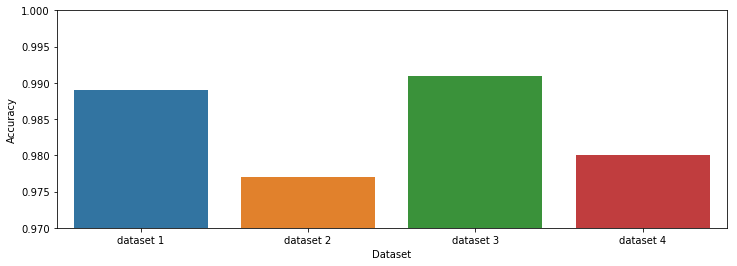

In [2]:
datasets = ['dataset 1', 'dataset 2', 'dataset 3', 'dataset 4']

y = [0.989, 0.977, 0.991, 0.980]

plt.figure(figsize=(12,4))
sns.barplot(x=datasets, y=y)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0.97, 1.00)
plt.show()
plt.close()

---